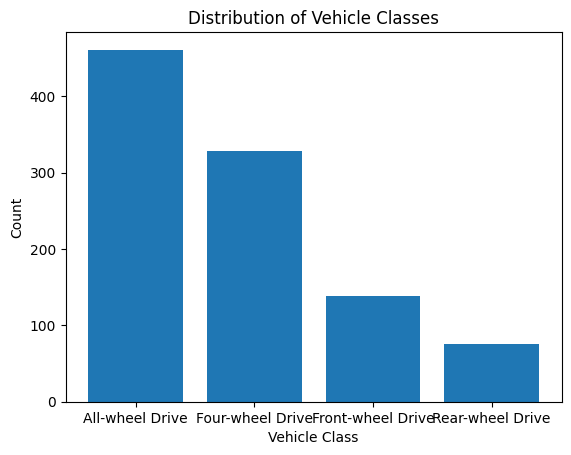

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/vehicle.csv")

target_column = data.columns[-1]
class_counts = data[target_column].value_counts()

plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel("Vehicle Class")
plt.ylabel("Count")
plt.title("Distribution of Vehicle Classes")
plt.show()


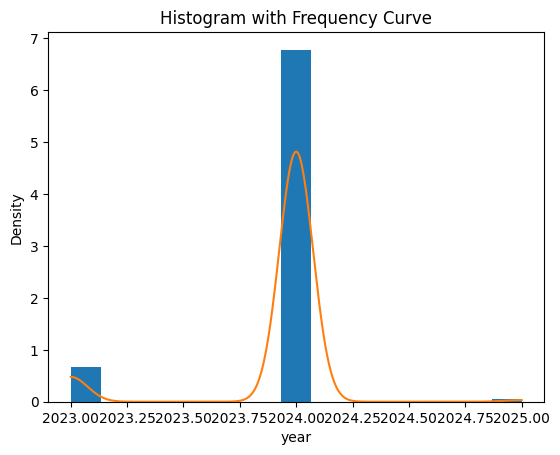

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

data = pd.read_csv("/content/vehicle.csv")

column = data.select_dtypes(include=np.number).columns[0]
values = data[column].dropna()

density = gaussian_kde(values)
x = np.linspace(values.min(), values.max(), 500)

plt.figure()
plt.hist(values, bins=15, density=True)
plt.plot(x, density(x))
plt.xlabel(column)
plt.ylabel("Density")
plt.title("Histogram with Frequency Curve")
plt.show()


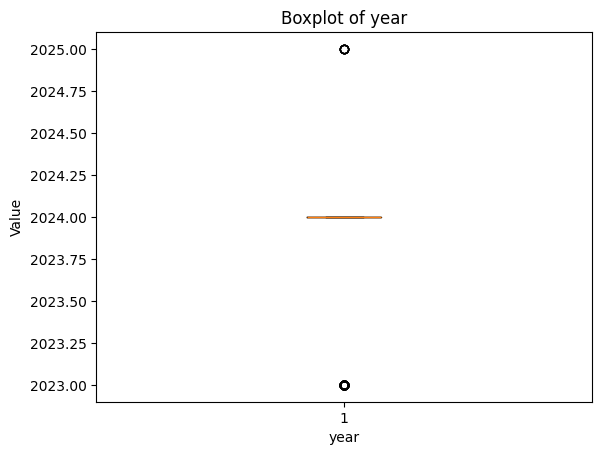

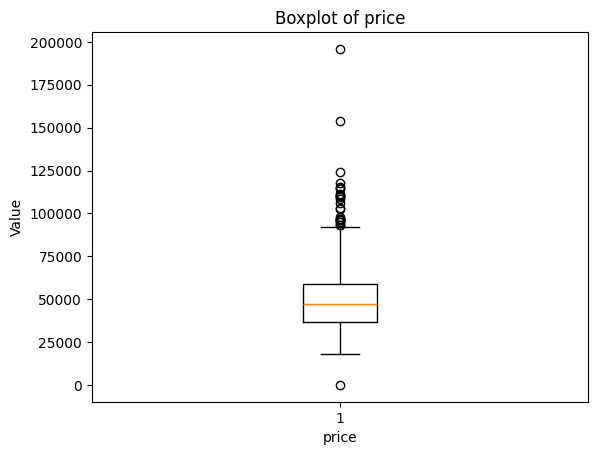

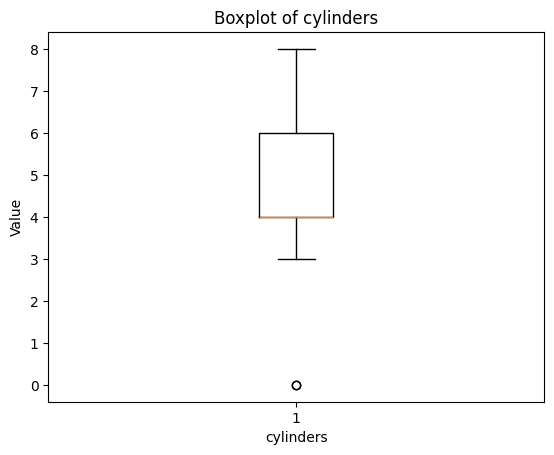

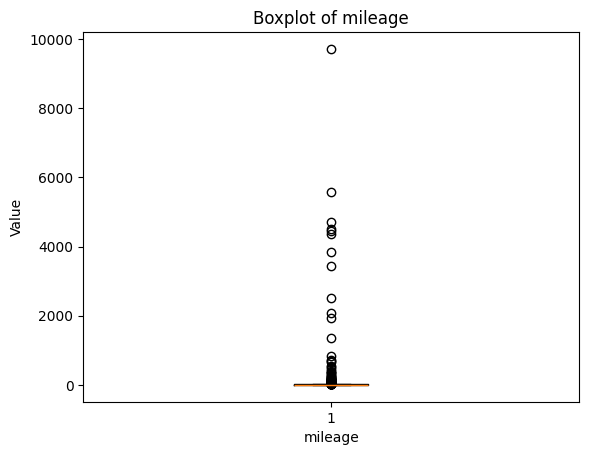

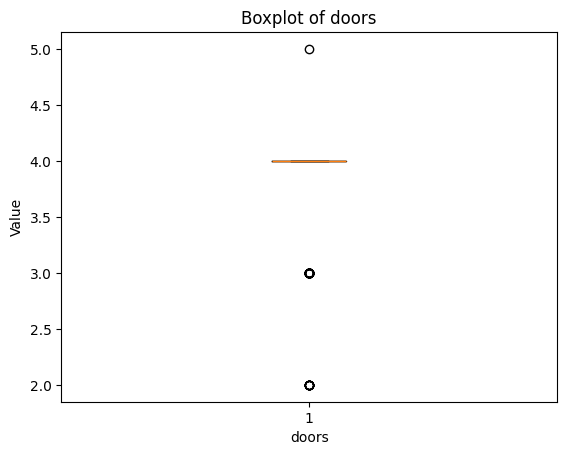

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/vehicle.csv")

for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    plt.boxplot(data[col].dropna())
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.title(f"Boxplot of {col}")
    plt.show()


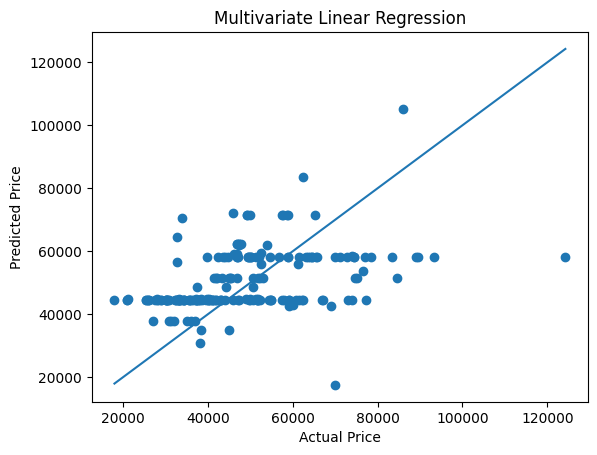

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/vehicle.csv")

numeric = data.select_dtypes(include=np.number)

X = numeric.drop(columns=["price"])
y = numeric["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

y_train_imputed = imputer.fit_transform(y_train.to_frame()).ravel()
y_test_imputed = imputer.transform(y_test.to_frame()).ravel()

model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)

y_pred = model.predict(X_test_imputed)

plt.figure()
plt.scatter(y_test_imputed, y_pred)
plt.plot([y_test_imputed.min(), y_test_imputed.max()], [y_test_imputed.min(), y_test_imputed.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multivariate Linear Regression")
plt.show()